In [1]:
import pandas as pd
import os
import keras
import cv2
from tqdm import tqdm
import seaborn as sns

In [2]:
train_img_folder = './train'
train_label_csv = './labels.csv'
train_df = pd.read_csv(train_label_csv)
input_shape = 224

label_list = train_df['breed'].unique()
def convert_labels(label_list,label):
    for index,lab in enumerate(label_list):
        if lab == label:
            return index
    else: 
        return -1
    
def split_dir(img_path,label,split_type):
    if split_type == 'train':
        img_fullpath = train_img_folder+'/'+img_path+'.jpg'
        img = cv2.imread(img_fullpath)
        img = cv2.resize(img,(input_shape,input_shape),interpolation=cv2.INTER_AREA)

        save_path = './train_split/'+str(label)
        os.makedirs(save_path,exist_ok=True)
        cv2.imwrite(save_path+'/'+img_path+'.jpg',img)
    elif split_type == 'valid':
        img_fullpath = train_img_folder+'/'+img_path+'.jpg'
        img = cv2.imread(img_fullpath)
        img = cv2.resize(img,(input_shape,input_shape),interpolation=cv2.INTER_AREA)

        save_path = './valid_split/'+str(label)
        os.makedirs(save_path,exist_ok=True)
        cv2.imwrite(save_path+'/'+img_path+'.jpg',img)
    elif split_type == 'raw':
        img_fullpath = train_img_folder+'/'+img_path+'.jpg'
        img = cv2.imread(img_fullpath)
        img = cv2.resize(img,(input_shape,input_shape),interpolation=cv2.INTER_AREA)

        save_path = './raw_split/'+str(label)
        os.makedirs(save_path,exist_ok=True)
        cv2.imwrite(save_path+'/'+img_path+'.jpg',img)

In [3]:
for label in train_df['breed'].unique():
    print(label)

boston_bull
dingo
pekinese
bluetick
golden_retriever
bedlington_terrier
borzoi
basenji
scottish_deerhound
shetland_sheepdog
walker_hound
maltese_dog
norfolk_terrier
african_hunting_dog
wire-haired_fox_terrier
redbone
lakeland_terrier
boxer
doberman
otterhound
standard_schnauzer
irish_water_spaniel
black-and-tan_coonhound
cairn
affenpinscher
labrador_retriever
ibizan_hound
english_setter
weimaraner
giant_schnauzer
groenendael
dhole
toy_poodle
border_terrier
tibetan_terrier
norwegian_elkhound
shih-tzu
irish_terrier
kuvasz
german_shepherd
greater_swiss_mountain_dog
basset
australian_terrier
schipperke
rhodesian_ridgeback
irish_setter
appenzeller
bloodhound
samoyed
miniature_schnauzer
brittany_spaniel
kelpie
papillon
border_collie
entlebucher
collie
malamute
welsh_springer_spaniel
chihuahua
saluki
pug
malinois
komondor
airedale
leonberg
mexican_hairless
bull_mastiff
bernese_mountain_dog
american_staffordshire_terrier
lhasa
cardigan
italian_greyhound
clumber
scotch_terrier
afghan_hound
old_

In [4]:
training_df = train_df.iloc[0:int(len(train_df)*0.7)]
evaluate_df = train_df.iloc[int(len(train_df)*0.7):]
print(len(training_df))
print(len(evaluate_df))
training_df['breed'] = training_df['breed'].apply(lambda x : convert_labels(label_list,x))
evaluate_df['breed'] = evaluate_df['breed'].apply(lambda x : convert_labels(label_list,x))



7155
3067


c:\users\user\desktop\programming\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\user\desktop\programming\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


c:\users\user\desktop\programming\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


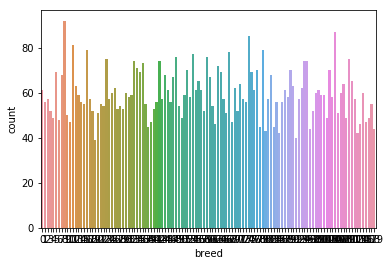

In [6]:
sns.countplot(training_df['breed'])

c:\users\user\desktop\programming\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


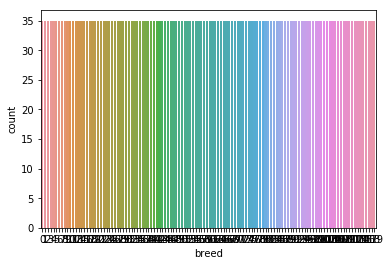

In [5]:
new_training_df = None
for idx in range(len(training_df['breed'].unique())):
    if idx == 0 :
        new_training_df = training_df[training_df['breed']==idx].sample(n=35,random_state=24)
    else:
        
        temp_training_df = training_df[training_df['breed']==idx].sample(n=35,random_state=24)
        new_training_df = pd.concat([new_training_df,temp_training_df],axis=0,ignore_index=True)
sns.countplot(new_training_df['breed'])

In [52]:
for index,row in tqdm(new_training_df.iterrows()):
    split_dir(row['id'],row['breed'],'train')
for index,row in tqdm(evaluate_df.iterrows()):
    split_dir(row['id'],row['breed'],'valid')
for index,row in tqdm(training_df.iterrows()):
    split_dir(row['id'],row['breed'],'raw')




0it [00:00, ?it/s]


11it [00:00, 106.07it/s]


26it [00:00, 115.26it/s]


37it [00:00, 110.98it/s]


49it [00:00, 111.93it/s]


61it [00:00, 111.15it/s]


71it [00:00, 100.83it/s]


83it [00:00, 104.05it/s]


96it [00:00, 108.81it/s]


111it [00:00, 118.38it/s]


124it [00:01, 121.34it/s]


140it [00:01, 128.55it/s]


153it [00:01, 127.98it/s]


168it [00:01, 131.75it/s]


182it [00:01, 129.76it/s]


197it [00:01, 134.98it/s]


213it [00:01, 139.98it/s]


228it [00:01, 142.11it/s]


243it [00:01, 143.11it/s]


258it [00:02, 143.75it/s]


273it [00:02, 133.13it/s]


288it [00:02, 135.84it/s]


302it [00:02, 124.55it/s]


315it [00:02, 124.06it/s]


328it [00:02, 115.21it/s]


340it [00:02, 106.47it/s]


351it [00:02, 102.21it/s]


364it [00:03, 96.00it/s] 


376it [00:03, 100.92it/s]


387it [00:03, 102.98it/s]


398it [00:03, 104.77it/s]


409it [00:03, 106.06it/s]


422it [00:03, 110.06it/s]


437it [00:03, 117.72it/s]


452it [00:03, 125.30it/s]


465it [00:03, 117.52it/s]


478i

1848it [00:14, 146.07it/s]


1863it [00:14, 145.36it/s]


1878it [00:14, 140.69it/s]


1893it [00:14, 140.89it/s]


1908it [00:15, 117.84it/s]


1922it [00:15, 121.10it/s]


1935it [00:15, 100.77it/s]


1947it [00:15, 105.38it/s]


1960it [00:15, 110.67it/s]


1975it [00:15, 119.33it/s]


1989it [00:15, 122.98it/s]


2003it [00:15, 127.04it/s]


2017it [00:16, 126.86it/s]


2030it [00:16, 97.04it/s] 


2043it [00:16, 103.10it/s]


2055it [00:16, 107.44it/s]


2068it [00:16, 113.12it/s]


2083it [00:16, 121.32it/s]


2096it [00:16, 120.80it/s]


2112it [00:16, 129.68it/s]


2128it [00:16, 135.21it/s]


2142it [00:17, 133.13it/s]


2156it [00:17, 134.88it/s]


2170it [00:17, 136.37it/s]


2185it [00:17, 138.36it/s]


2200it [00:17, 138.67it/s]


2215it [00:17, 140.50it/s]


2230it [00:17, 126.01it/s]


2245it [00:17, 131.76it/s]


2260it [00:17, 135.37it/s]


2275it [00:18, 137.54it/s]


2289it [00:18, 129.92it/s]


2303it [00:18, 129.25it/s]


2318it [00:18, 134.58it/s]


2332it [00:18,

5113it [00:37, 136.75it/s]


5128it [00:37, 139.40it/s]


5143it [00:38, 137.83it/s]


5159it [00:38, 142.00it/s]


5174it [00:38, 142.09it/s]


5189it [00:38, 125.34it/s]


5202it [00:38, 118.50it/s]


5217it [00:38, 125.29it/s]


5230it [00:38, 112.93it/s]


5244it [00:38, 117.55it/s]


5258it [00:39, 122.29it/s]


5271it [00:39, 113.83it/s]


5284it [00:39, 118.01it/s]


5299it [00:39, 124.59it/s]


5312it [00:39, 123.39it/s]


5327it [00:39, 128.75it/s]


5345it [00:39, 140.33it/s]


5360it [00:39, 138.08it/s]


5375it [00:39, 136.17it/s]


5390it [00:39, 138.59it/s]


5407it [00:40, 145.63it/s]


5422it [00:40, 127.89it/s]


5436it [00:40, 109.30it/s]


5452it [00:40, 119.42it/s]


5469it [00:40, 129.51it/s]


5484it [00:40, 134.99it/s]


5499it [00:40, 137.93it/s]


5514it [00:40, 139.67it/s]


5529it [00:41, 132.77it/s]


5543it [00:41, 126.23it/s]


5557it [00:41, 129.59it/s]


5572it [00:41, 134.29it/s]


5588it [00:41, 140.08it/s]


5603it [00:41, 127.50it/s]


5618it [00:41,

In [6]:
#PYTORCH IMPLEMENTATION
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
from torch.utils.data import Dataset,DataLoader,TensorDataset
from tqdm import tqdm
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import os


import torchvision.models as models

class mobilenetv2Model(nn.Module):
  def __init__(self):
    super(mobilenetv2Model,self).__init__()

    model = models.mobilenet_v2(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    num_ftrs = 1280 #cannot get from classifier component
    model.classifier = nn.Sequential(nn.Dropout(p=0.2,inplace=False),
                                          nn.Linear(in_features = num_ftrs,out_features = 256),
                                          nn.Dropout(p=0.5),
                                          nn.Linear(256,120))
    self.pretrainedModel = model
  def forward(self,x):
    x = self.pretrainedModel(x)
    return x


In [7]:
from torch.utils.data import Dataset,DataLoader,TensorDataset
import torchvision
from torchvision import transforms
torch.cuda.empty_cache()
batch_size = 8

def load_dataset():
    
    transform_img = transforms.Compose([
        transforms.Resize(input_shape),
        transforms.CenterCrop(input_shape),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    train_dataset = torchvision.datasets.ImageFolder(
        root='./train_split/',
        transform=transform_img
            
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )

    test_dataset = torchvision.datasets.ImageFolder(
        root='./valid_split/',
        transform=transform_img
        
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    
    return train_loader,test_loader

def train(trainloader,model):
    if torch.cuda.is_available():
        device = torch.device("cuda")
    else:
        device = torch.device('cpu')
    print(device)
    
    model.to(device)
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)
    criterion = nn.CrossEntropyLoss()
    
    gradient_acc_steps = 1
    total_loss = 0
    total_acc = 0
    
    for idx,batch in tqdm(enumerate(trainloader)):
        data,targets = batch[0],batch[1]
        
        model.zero_grad()
        data = data.reshape(-1,3,input_shape,input_shape).to(device)
        targets_CPU = targets.unsqueeze(1).type(torch.float32).to('cpu')
        output_GPU = model(data)
        output = output_GPU.to('cpu')
#         print(data.shape)
#         print(targets.shape)
#         print(output.shape)

        loss = criterion(output, targets)
        
        output = torch.argmax(output,1)
        
        
        loss = loss / gradient_acc_steps
        loss.backward()
        
        if (idx % gradient_acc_steps) == 0:
            optimizer.step()
            optimizer.zero_grad()
            
        total_loss += loss.item()
        
        correct = (output==targets).sum()
        total_acc += float(correct)/len(targets)
        
#         print('batch {} : accuracy {}'.format(idx,float(correct)/len(targets)))
    
    print('overall accuracy = {}'.format(total_acc/len(trainloader)))

    
model = mobilenetv2Model()
epochs = 10
trainloader , testloader = load_dataset()
for epoch in range(epochs):
    train(trainloader, model)

model.to('cpu')
example_input = torch.rand(1,3,224,224)
traced_script_module = torch.jit.trace(model,example_input)
traced_script_module.save("./model.pt")




cuda


525it [00:28, 18.38it/s]
3it [00:00, 19.41it/s]

overall accuracy = 0.1492857142857143
cuda


525it [00:24, 21.84it/s]
2it [00:00, 18.07it/s]

overall accuracy = 0.38095238095238093
cuda


525it [00:23, 22.04it/s]
3it [00:00, 21.64it/s]

overall accuracy = 0.46523809523809523
cuda


525it [00:23, 21.92it/s]
3it [00:00, 21.04it/s]

overall accuracy = 0.5038095238095238
cuda


525it [00:24, 21.61it/s]
3it [00:00, 22.96it/s]

overall accuracy = 0.5207142857142857
cuda


525it [00:25, 20.59it/s]
3it [00:00, 21.80it/s]

overall accuracy = 0.5554761904761905
cuda


525it [00:23, 22.17it/s]
3it [00:00, 20.60it/s]

overall accuracy = 0.5635714285714286
cuda


525it [00:23, 22.28it/s]
3it [00:00, 22.62it/s]

overall accuracy = 0.5988095238095238
cuda


525it [00:23, 22.34it/s]
3it [00:00, 22.62it/s]

overall accuracy = 0.5904761904761905
cuda


525it [00:23, 22.17it/s]


overall accuracy = 0.6092857142857143


c:\users\user\desktop\programming\python36\lib\site-packages\torch\jit\__init__.py:1037: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Not within tolerance rtol=1e-05 atol=1e-05 at input[0, 14] (-0.8159876465797424 vs. -4.076290130615234) and 119 other locations (100.00%)
  check_tolerance, _force_outplace, True, _module_class)
